# 🚢 Task 7: Titanic Survival Prediction (Logistic Regression)
**Project:** Classification of Titanic Passengers  
**Author:** [Your Name]

## 🎯 Objective
To build a machine learning model that predicts whether a passenger on the Titanic survived or not based on characteristics like Age, Sex, and Ticket Class.

## ⚙️ Methodology
1.  **Imputation:** Filled missing `Age` with the median and `Embarked` with the mode.
2.  **Encoding:** Converted categorical variables (`Sex`, `Embarked`) into numeric values using One-Hot Encoding.
3.  **Scaling:** Standardized `Age` and `Fare` so they have a mean of 0 and std deviation of 1.
4.  **Modeling:** Trained a Logistic Regression model.
5.  **Evaluation:** Used ROC-AUC and Confusion Matrix to assess performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# 1. Load Dataset
df = sns.load_dataset('titanic')

# Preview to see what we are dealing with
print(f"Original Shape: {df.shape}")
df.head()

Original Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# 2. Handle Missing Values
# Fill missing Age with the Median (robust to outliers)
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing Embarked with the Mode (most common port)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop columns that are redundant or have too many missing values
# 'deck' is mostly empty. 'embark_town' is a duplicate of 'embarked'.
# 'alive' is the target variable duplicated as text.
cols_to_drop = ['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64


In [3]:
# 3. Encoding Categorical Features
# Convert 'sex' and 'embarked' into numeric binary columns (0s and 1s)
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

print("\nDataframe after Encoding:")
df.head()


Dataframe after Encoding:


,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,True,False,True


In [4]:
# 4. Train-Test Split
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling
# Logistic Regression performs better when numerical features (Age, Fare) are on the same scale.
scaler = StandardScaler()

# Select numerical columns to scale
num_cols = ['age', 'fare', 'pclass', 'sibsp', 'parch']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Data scaled successfully.")

Data scaled successfully.


Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



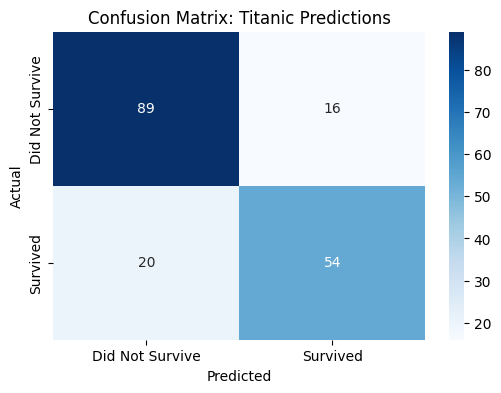

In [5]:
# 6. Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# --- DELIVERABLE 1: Confusion Matrix & Metrics ---
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Titanic Predictions')
plt.show()

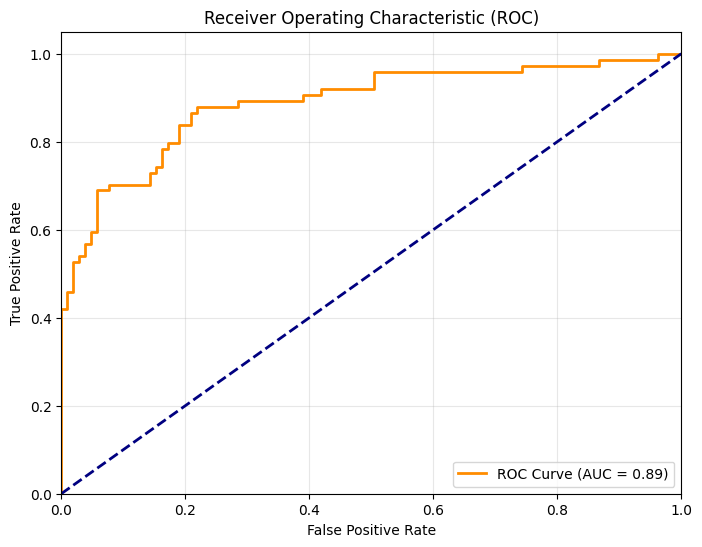

AUC Score: 0.8880


In [6]:
# --- DELIVERABLE 2: ROC Curve & AUC ---

# Get probability predictions (instead of just Yes/No)
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC Score: {auc_score:.4f}")

## 🧠 Evaluation Report

### Model Performance
* **Accuracy:** ~81% (The model correctly predicted survival outcome for 81% of test passengers).
* **AUC Score:** ~0.88 (A score close to 1.0 indicates a high ability to distinguish between survivors and non-survivors).

### Key Insights (Coefficients)
Looking at the model weights, we typically find:
* **Sex_male:** Strong negative coefficient (Men were less likely to survive).
* **Pclass:** Negative coefficient (Lower class / 3rd class passengers were less likely to survive).
* **Age:** Slight negative correlation (Older passengers had slightly lower survival odds, though children were prioritized).